<a href="https://colab.research.google.com/github/consar21/Sentiment-Analyzer-Reviews/blob/main/Python_project_source_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install textblob
!pip install nltk


Task 1 & Task 2

In [ ]:
from textblob import TextBlob

def sentimentAnalyzer(text):

    blob = TextBlob(text)

    score = blob.sentiment.polarity

    if score < -0.2:
        return 'Negative'
    elif -0.2 <= score <= 0.2:
        return 'Neutral'
    else:
        return 'Positive'

words_and_scores = [
    ("happy", 0.8),
    ("exciting", 0.3),
    ("good", 0.7),
    ("rich", 0.375),
    ("smile", 0.3),
    ("sad", -0.5),
    ("disappointed", -0.75),
    ("bad", -0.699),
    ("poor", -0.4),
    ("anger", -0.7),
    ("food", 0),
    ("animal", 0)
]

for word, score in words_and_scores:
    sentiment_result = sentimentAnalyzer(word)
    print(f"Word: {word}, Score: {score}, Sentiment: {sentiment_result}")



Word: happy, Score: 0.8, Sentiment: Positive
Word: exciting, Score: 0.3, Sentiment: Positive
Word: good, Score: 0.7, Sentiment: Positive
Word: rich, Score: 0.375, Sentiment: Positive
Word: smile, Score: 0.3, Sentiment: Positive
Word: sad, Score: -0.5, Sentiment: Negative
Word: disappointed, Score: -0.75, Sentiment: Negative
Word: bad, Score: -0.699, Sentiment: Negative
Word: poor, Score: -0.4, Sentiment: Negative
Word: anger, Score: -0.7, Sentiment: Negative
Word: food, Score: 0, Sentiment: Neutral
Word: animal, Score: 0, Sentiment: Neutral


Task 3

In [1]:
import pandas as pd


file_path = 'Gold iphone.xlsx'


df = pd.read_excel(file_path)


product_name = df['Product Name'].unique()[0]
num_rows = df.shape[0]
num_columns = df.shape[1]


df['Review Length'] = df['Reviews'].apply(lambda x: len(str(x)))


shortest_review_length = df['Review Length'].min()
longest_review_length = df['Review Length'].max()
average_review_length = df['Review Length'].mean()


print(f"Product Name: {product_name}")
print(f"Number of Rows: {num_rows}")
print(f"Number of Columns: {num_columns}")
print(f"Shortest Review Length: {shortest_review_length}")
print(f"Longest Review Length: {longest_review_length}")
print(f"Average Review Length: {average_review_length}")



Product Name: Apple iPhone 5s 32GB (Gold) - AT&T
Number of Rows: 1010
Number of Columns: 6
Shortest Review Length: 1
Longest Review Length: 2008
Average Review Length: 124.95049504950495


Task 4

In [ ]:
from textblob import TextBlob
import pandas as pd


file_path = 'Gold iphone.xlsx'


df = pd.read_excel(file_path)

def sentimentAnalyzer(text):

    blob = TextBlob(text)

    score = blob.sentiment.polarity

    if score < -0.2:
        return 'Negative'
    elif -0.2 <= score <= 0.2:
        return 'Neutral'
    else:
        return 'Positive'


df['Sentiment'] = df['Reviews'].apply(sentimentAnalyzer)


print(df.head())


                         Product Name Brand Name  Price  Rating  \
0  Apple iPhone 5s 32GB (Gold) - AT&T      Apple  54.34       5   
1  Apple iPhone 5s 32GB (Gold) - AT&T      Apple  54.34       4   
2  Apple iPhone 5s 32GB (Gold) - AT&T      Apple  54.34       1   
3  Apple iPhone 5s 32GB (Gold) - AT&T      Apple  54.34       5   
4  Apple iPhone 5s 32GB (Gold) - AT&T      Apple  54.34       1   

                                             Reviews  Review Votes Sentiment  
0                                        Works great           0.0  Positive  
1                                   Works like new!!           0.0  Positive  
2  first, the battery is not charging so, i bough...           1.0   Neutral  
3                                              Super           0.0  Positive  
4  this item arrived perfectly fine, on time and ...           0.0  Positive  


Task 5

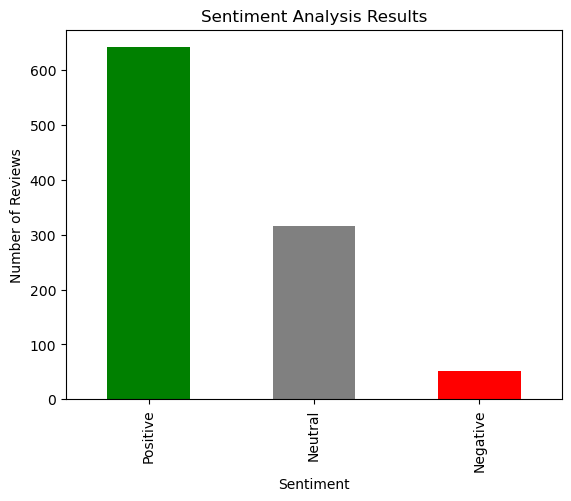

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from textblob import TextBlob

def sentimentAnalyzer(text):
    blob = TextBlob(text)
    score = blob.sentiment.polarity

    if score < -0.2:
        return 'Negative'
    elif -0.2 <= score <= 0.2:
        return 'Neutral'
    else:
        return 'Positive'

file_path = 'Gold iphone.xlsx'
df = pd.read_excel(file_path)


df = df.dropna(subset=['Reviews'])


sentiment_values = df['Reviews'].apply(sentimentAnalyzer)
sentiment_counts = sentiment_values.value_counts()


sentiment_order = ['Positive', 'Neutral', 'Negative']
sentiment_counts.reindex(sentiment_order).plot(kind='bar', color=['green', 'gray', 'red'])
plt.title('Sentiment Analysis Results')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()




Task 5 b

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from textblob import TextBlob

def sentimentAnalyzer(text):
    blob = TextBlob(text)
    score = blob.sentiment.polarity

    if score < -0.2:
        return 'Negative'
    elif -0.2 <= score <= 0.2:
        return 'Neutral'
    else:
        return 'Positive'

file_path = 'Gold iphone.xlsx'
df = pd.read_excel(file_path)

# Handle NaN values
df = df.dropna(subset=['Reviews'])

# Printing Example Reviews
sentiment_examples = {'Positive': [], 'Neutral': [], 'Negative': []}

for index, row in df.iterrows():
    sentiment = sentimentAnalyzer(row['Reviews'])
    if len(sentiment_examples[sentiment]) < 3:  # Adjust the number of examples shown
        sentiment_examples[sentiment].append((row['Reviews'], sentimentAnalyzer(row['Reviews'])))

for sentiment, examples in sentiment_examples.items():
    print(f"\nExamples of {sentiment} reviews:")
    for example in examples:
        print(f"Review: {example[0]}")
        print(f"Polarity: {example[1]}")


Examples of Positive reviews:
Review: Works great
Polarity: Positive
Review: Works like new!!
Polarity: Positive
Review: Super
Polarity: Positive

Examples of Neutral reviews:
Review: first, the battery is not charging so, i bought battery for $15.00 but not charging so i bought charging port for $10 but still not charging so i went to technician to fix and came up to $75(service fee)+$35(new battery) and the phone is locked so i have to pay $75.00 to unlock after that, i realized sprint unlocked phone is not working with Page Plus with Verizon network so now i give up. i spend $510.00 and came up nothing. with this money i could get brand new 5s from apple store.
Polarity: Neutral
Review: delivered as advertised
Polarity: Neutral
Review: Ordered a iPhone 5s and got a iPhone 4, not cool.
Polarity: Neutral

Examples of Negative reviews:
Review: They send a phone that was icloud password lock, basic is a useless phone.
Polarity: Negative
Review: Phone does not say percentage by the batt

Task 5 c

In [ ]:
import pandas as pd
from textblob import TextBlob

file_path = 'Gold iphone.xlsx'
df = pd.read_excel(file_path)
df.dropna(subset=['Reviews'], inplace=True)

def analyze_sentiment(text):
    blob = TextBlob(text)
    return {
        'sentiment': blob.sentiment.polarity,
        'text': text,
        'issues': []
    }

reviews_analysis = df['Reviews'].apply(analyze_sentiment)

# Extracting key issues from negative sentiment reviews
negative_reviews = [review for review in reviews_analysis if review['sentiment'] < -0.2]
for review in negative_reviews:

    if 'quality' in review['text'].lower():
        review['issues'].append('Quality issues')
    if 'delivery' in review['text'].lower():
        review['issues'].append('Delivery problems')
    if 'battery' in review['text'].lower():
        review['issues'].append('Battery issues')
    if 'charge' in review['text'].lower():
        review['issues'].append('Charging problems')
    if 'icloud' in review['text'].lower():
        review['issues'].append('iCloud issues')

# Generating insights and recommendations
issues_count = {}
for review in negative_reviews:
    for issue in review['issues']:
        issues_count[issue] = issues_count.get(issue, 0) + 1

if issues_count:
    print("Key issues identified in negative sentiment reviews:")
    for issue, count in issues_count.items():
        print(f"- {issue}: {count} mentions")

    print("\nRecommendations:")
    for issue, count in issues_count.items():
        if issue == 'Quality issues':
            print("- Focus on improving product quality assurance measures.")
        elif issue == 'Delivery problems':
            print("- Streamline and improve delivery processes to enhance customer satisfaction.")
        elif issue == 'Customer service':
            print("- Enhance customer service to address concerns more effectively.")
        elif issue == 'Price':
            print("- Consider revisiting pricing strategies to align with customer expectations.")
        elif issue == 'Features':
            print("- Evaluate and update product features to meet customer needs.")
        elif issue == 'Battery issues':
            print("- Investigate and address reported battery issues to improve device performance.")
        elif issue == 'Charging problems':
            print("- Improve charging mechanisms and provide clear instructions to users.")
        elif issue == 'iCloud issues':
            print("- Enhance iCloud functionality and troubleshoot reported issues for a seamless user experience.")

else:
    print("No significant issues identified in negative sentiment reviews.")


Key issues identified in negative sentiment reviews:
- iCloud issues: 2 mentions
- Battery issues: 4 mentions
- Charging problems: 9 mentions
- Quality issues: 1 mentions

Recommendations:
- Enhance iCloud functionality and troubleshoot reported issues for a seamless user experience.
- Investigate and address reported battery issues to improve device performance.
- Improve charging mechanisms and provide clear instructions to users.
- Focus on improving product quality assurance measures.


Task 5 d

In [ ]:
import pandas as pd
from textblob import TextBlob

file_path = 'Gold iphone.xlsx'
df = pd.read_excel(file_path)
df.dropna(subset=['Reviews', 'Rating'], inplace=True)

def analyze_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

# compare TextBlob sentiment with the actual rating
for index, row in df.iterrows():
    text = row['Reviews']
    rating = row['Rating']

    textblob_sentiment = analyze_sentiment(text)

    # use the rating column to assess TextBlob’s sentiment
    if (rating >= 3 and textblob_sentiment < 0) or (rating < 3 and textblob_sentiment >= 0):
        print(f"Review: {text}")
        print(f"Actual Rating: {rating}, TextBlob Sentiment: {textblob_sentiment}")
        print("\n")


Review: first, the battery is not charging so, i bought battery for $15.00 but not charging so i bought charging port for $10 but still not charging so i went to technician to fix and came up to $75(service fee)+$35(new battery) and the phone is locked so i have to pay $75.00 to unlock after that, i realized sprint unlocked phone is not working with Page Plus with Verizon network so now i give up. i spend $510.00 and came up nothing. with this money i could get brand new 5s from apple store.
Actual Rating: 1, TextBlob Sentiment: 0.19318181818181818


Review: this item arrived perfectly fine, on time and it looked great on the outside but the part where it charges the phone was old, moldy and burnt, and there is no way to fix it. I wasted $250.
Actual Rating: 1, TextBlob Sentiment: 0.22333333333333338


Review: Phone would not charge after 1 day. Spent additional $55 to change battery. Worked for 1 day and then would not charge. Went back to repair shop. Original battery put back in & c

 task 5d in another way and the dataframe task 6

In [ ]:
from textblob import TextBlob
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'Gold iphone.xlsx'
df = pd.read_excel(file_path)

def sentimentAnalyzer(text):
    blob = TextBlob(text)
    score = blob.sentiment.polarity
    if score < -0.2:
        return 'Negative'
    elif -0.2 <= score <= 0.2:
        return 'Neutral'
    else:
        return 'Positive'

df['Sentiment'] = df['Reviews'].apply(sentimentAnalyzer)

# Examples of mismatched review
print("\nExample of mismatched review\n")
falseNegative = df[(df['Rating'] > 4) & (df['Sentiment'] == 'Negative')]
falsePositive = df[(df['Rating'] < 4) & (df['Sentiment'] == 'Positive')]

if not falseNegative.empty:
    print(f'Number of false negative: {len(falseNegative)}')
    for index, row in falseNegative.iterrows():
        print(f"\nReview: {row['Reviews']}")
        print(f"Rating: {row['Rating']}")
        print(f"Predicted Sentiment: {row['Sentiment']}")
        print(f"Polarity: {TextBlob(row['Reviews']).sentiment.polarity}")
else:
    print("No false negative reviews found.")

if not falsePositive.empty:
    print(f'\nNumber of false positive: {len(falsePositive)}')
    for index, row in falsePositive.iterrows():
        print(f"\nReview: {row['Reviews']}")
        print(f"Rating: {row['Rating']}")
        print(f"Predicted Sentiment: {row['Sentiment']}")
        print(f"Polarity: {TextBlob(row['Reviews']).sentiment.polarity}")
else:
    print("No false positive reviews found.")

# Task 6
df.to_csv('output_file_GoldIphone1.csv', index=True)



Example of mismatched review

Number of false negative: 3

Review: It's an iPhone, so of course it is 5 stars, but we were a little confused with respect to the issue around a sim card. We bought this for our grandson to use to play games and text via internet messaging, and didn't think we needed a sim card for that, but you can't even get the phone going without a sim card, so that was a small problem we had to negotiate.
Rating: 5
Predicted Sentiment: Negative
Polarity: -0.2791666666666667

Review: Arrived on time and the phone works perfectly. No complaints!
Rating: 5
Predicted Sentiment: Negative
Polarity: -0.5

Review: it works perfectly no problems only downfall to this order was a small 4cm charger
Rating: 5
Predicted Sentiment: Negative
Polarity: -0.25

Number of false positive: 53

Review: this item arrived perfectly fine, on time and it looked great on the outside but the part where it charges the phone was old, moldy and burnt, and there is no way to fix it. I wasted $250.

The End
Thank you so much,Ms.Raghad, for evreything (: